In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

## Cleaning and Merging data

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Count the null values
city_data_df.isnull().sum()
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Suburban")

36

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [16]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Get the number of rides for Suburban and Rural cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(suburban_ride_count.head())
print(rural_ride_count.head())

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [19]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [21]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

## Bubble Charts of PyBer Ride-Sharing Data

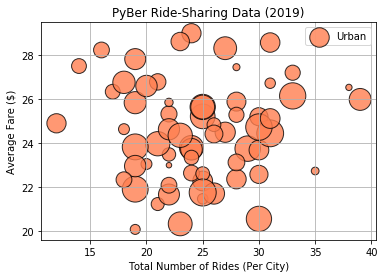

In [23]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            label = "Urban",
            color ='coral', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid()
plt.legend()
plt.show()

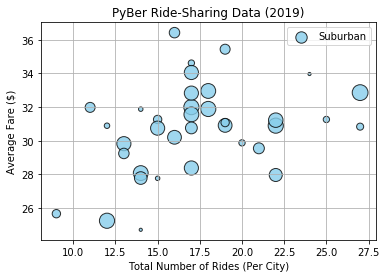

In [24]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label = "Suburban",
            color ='skyblue', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid()
plt.legend()
plt.show()

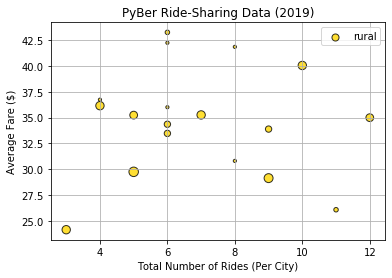

In [25]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            label = "rural",
            color ='gold', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid()
plt.legend()
plt.show()

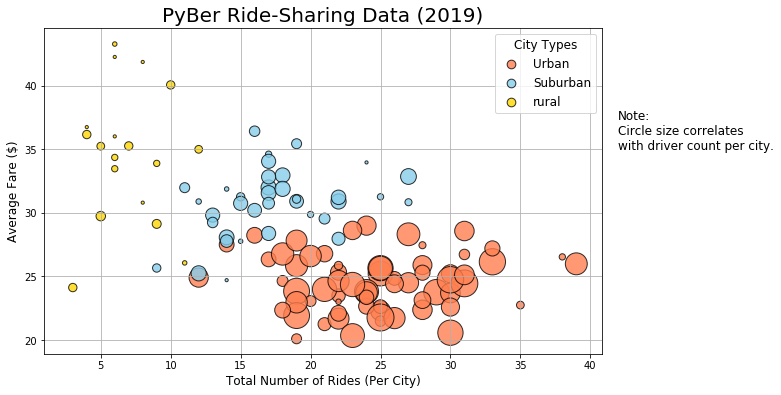

In [26]:
# Add the scatter charts for each type of city into one chart
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            label = "Urban",
            color ='coral', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label = "Suburban",
            color ='skyblue', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            label = "rural",
            color ='gold', alpha= 0.8,
            edgecolor ='black', linewidth = 1)
# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize='12', mode = 'Expanded',
                 scatterpoints = 1, loc="best", title ="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
# show the plot
plt.show()


## Summary Statistics 

In [27]:
# Get summary statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [35]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [36]:
suburban_ride_count.mode()

0    17
dtype: int64

In [37]:
rural_ride_count.mode()

0    6
dtype: int64

In [38]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [42]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver counts for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver counts for urban trips is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver counts for urban trips is {mode_urban_drivers}.")

The mean driver counts for urban trips is 37.
The median driver counts for urban trips is 37.
The mode driver counts for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [47]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver counts for suburban trips is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver counts for suburban trips is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver counts for suburban trips is {mode_suburban_drivers}.")

The mean driver counts for suburban trips is 14.
The median driver counts for suburban trips is 16.
The mode driver counts for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [48]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver counts for rural trips is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver counts for rural trips is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver counts for rural trips is {mode_rural_drivers}.")

The mean driver counts for rural trips is 4.
The median driver counts for rural trips is 4.
The mode driver counts for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


### Box and whisker plots

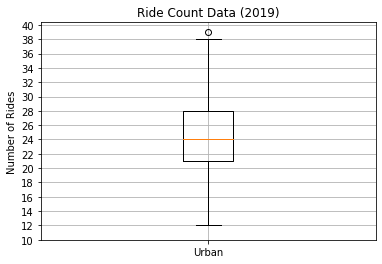

In [49]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

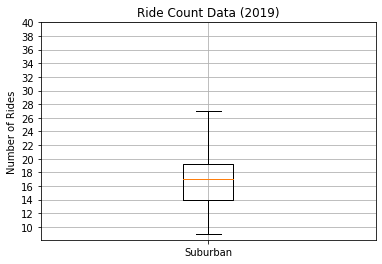

In [50]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

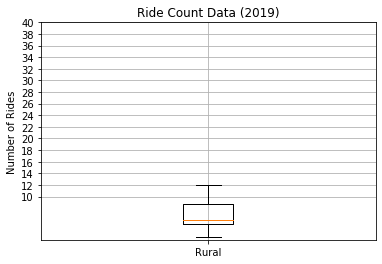

In [51]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

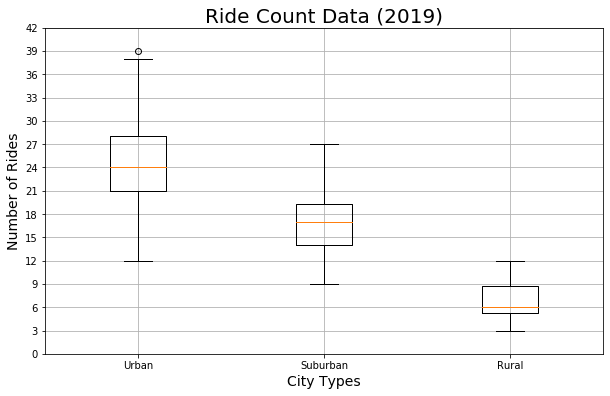

In [52]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [53]:
# Get the city that matches 39 
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


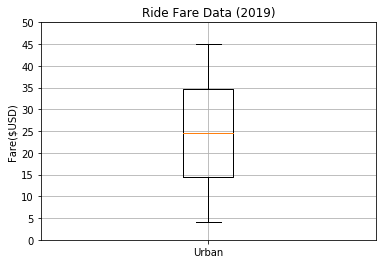

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [54]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

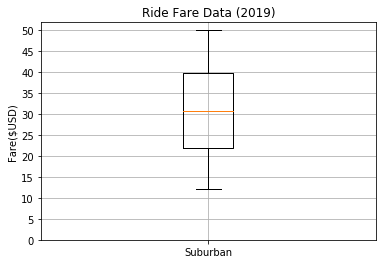

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [55]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

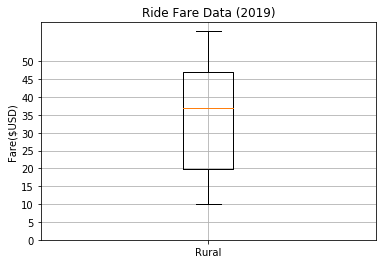

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [56]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

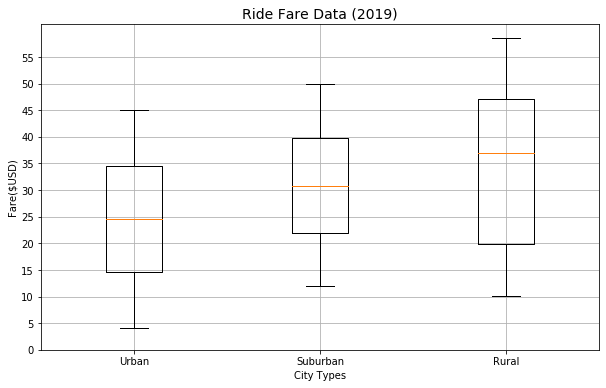

In [57]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Urban","Suburban","Rural"]
summary_fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(summary_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize = 14)
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
# Save the image
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

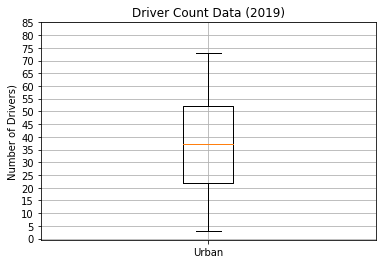

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [58]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

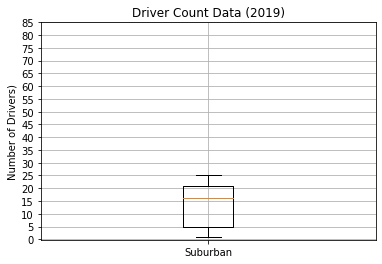

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [59]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

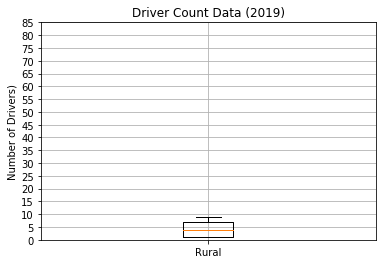

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [60]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

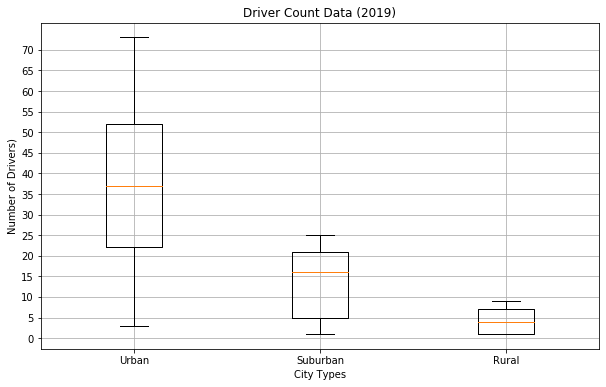

In [61]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
summary_drivers = [urban_drivers,suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(summary_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

## Pie Chart

 ### A. Percentage of Total Fares by City Type.

In [62]:
# Get the sum of the fares for each city type. 
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
# Get the total rides
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [64]:
# Calculate the percentage of fare for each city type. 
type_percents = 100*sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [65]:
# Calculate the percentage of fare for each city type. 
type_percents = 100*pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

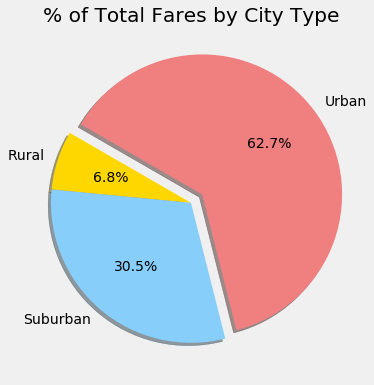

In [95]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

## B. Percentage of Total Rides by City Type

In [67]:
# Get the sum of the rides for each city type. 
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [68]:
# Get the total rides
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [69]:
# Calculate the percentage of rides for each city type.
ride_percents = 100*pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

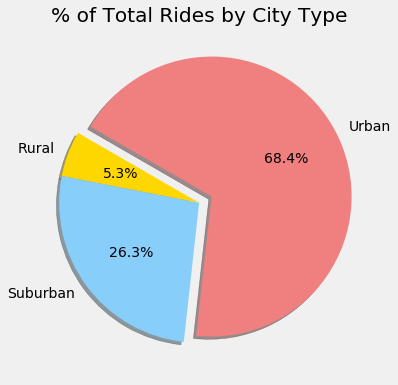

In [96]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
# Build the percentage of rides by city type pie chart.
plt.pie(ride_percents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
plt.show()

## C. Percentage of Total Drivers by City Type

In [71]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100*pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

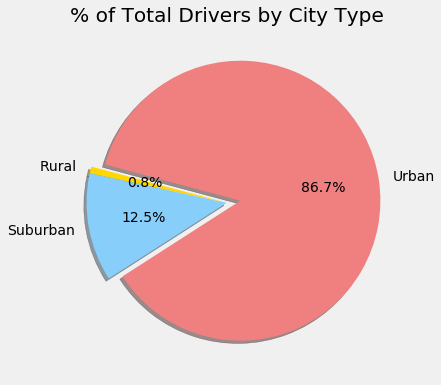

In [97]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

## Technical Analysis Deliverable 1: 
### A summary DataFrame of the key metrics for the ride-sharing data by city type.
- Total Rides
- Total Drivers
- Total Fares
- Average Fare per Ride
- Average Fare per Driver

In [73]:
# Get the total rides and total fares for each city type. 
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [74]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [75]:
# Get unique drivers count for each cities
city_drivers = pyber_data_df.groupby(["type","city"]).mean()["driver_count"]
city_drivers_df = pd.DataFrame(city_drivers)

In [76]:
# Get total Drivers for each city type
total_drivers = city_drivers_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [77]:
# Calculate the avg.fare per ride and avg.fare per driver
avg_fare_ride = total_fares/total_rides
avg_fare_driver = total_fares/total_drivers

In [78]:
# Merge summary dataframe
summary_df = pd.DataFrame({
            "Total Rides": total_rides,
            "Total Drivers": total_drivers,
            "Total Fares": total_fares,
            "Average Fare per Ride": avg_fare_ride,
            "Average Fare per Driver": avg_fare_driver
})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [79]:
# Create the summary datafrme with columns and formatting
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"]= summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"]= summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"]=summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"]=summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405.0","$39,854.38",$24.53,$16.57


In [80]:
# Delete the index name
summary_df.rename_axis(None, inplace=True)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405.0","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2: 
### Multiple-Line Plot for the Sum of the Fares for Each City Type

In [81]:
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [82]:
# 1. Rename columns
pyber_data_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [83]:
# 2. Set the index to the Date column.
pyber_data_df = pyber_data_df.set_index(["Date"])
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [84]:
# 3. Create new DataFrame
pyber_new_df = pyber_data_df[['City Type','Fare']].copy()
pyber_new_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [85]:
# 4. Set the index to the datetime data type
pyber_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [86]:
pyber_new_df.index = pd.to_datetime(pyber_new_df.index)

In [87]:
# 5 & 6. Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
sum_fares_df=pd.DataFrame(pyber_new_df.groupby(["City Type","Date"]).sum()["Fare"])
sum_fares_df.head()

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [88]:
# 7. Reset index and Create pivot table
sum_fares_df.reset_index()

sum_fares_df=sum_fares_df.pivot_table(index='Date',
                                columns = 'City Type',
                                values = 'Fare')
sum_fares_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [89]:
# 8. Create a new DataFrame from the pivot table DataFrame on the given dates 
sum_new_df = sum_fares_df.loc['2019-01-01':'2019-04-28']
sum_new_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [90]:
# 9. Create a dataframe in weekly bins
sum_week_df = sum_new_df.resample('W').sum()
sum_week_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [91]:
# 10. Create line plot 

#### Things to consider with creating new plot 
- Import the style from Matplotlib.
- Use the FiveThirtyEight (Links to an external site.) graph style.
- Add a title.
- Add x- and y-axis labels according to the final figure.
- Save the figure to the “analysis” folder.
- Make the figure size large enough so it’s not too small.

In [92]:
# import the stlye from Matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

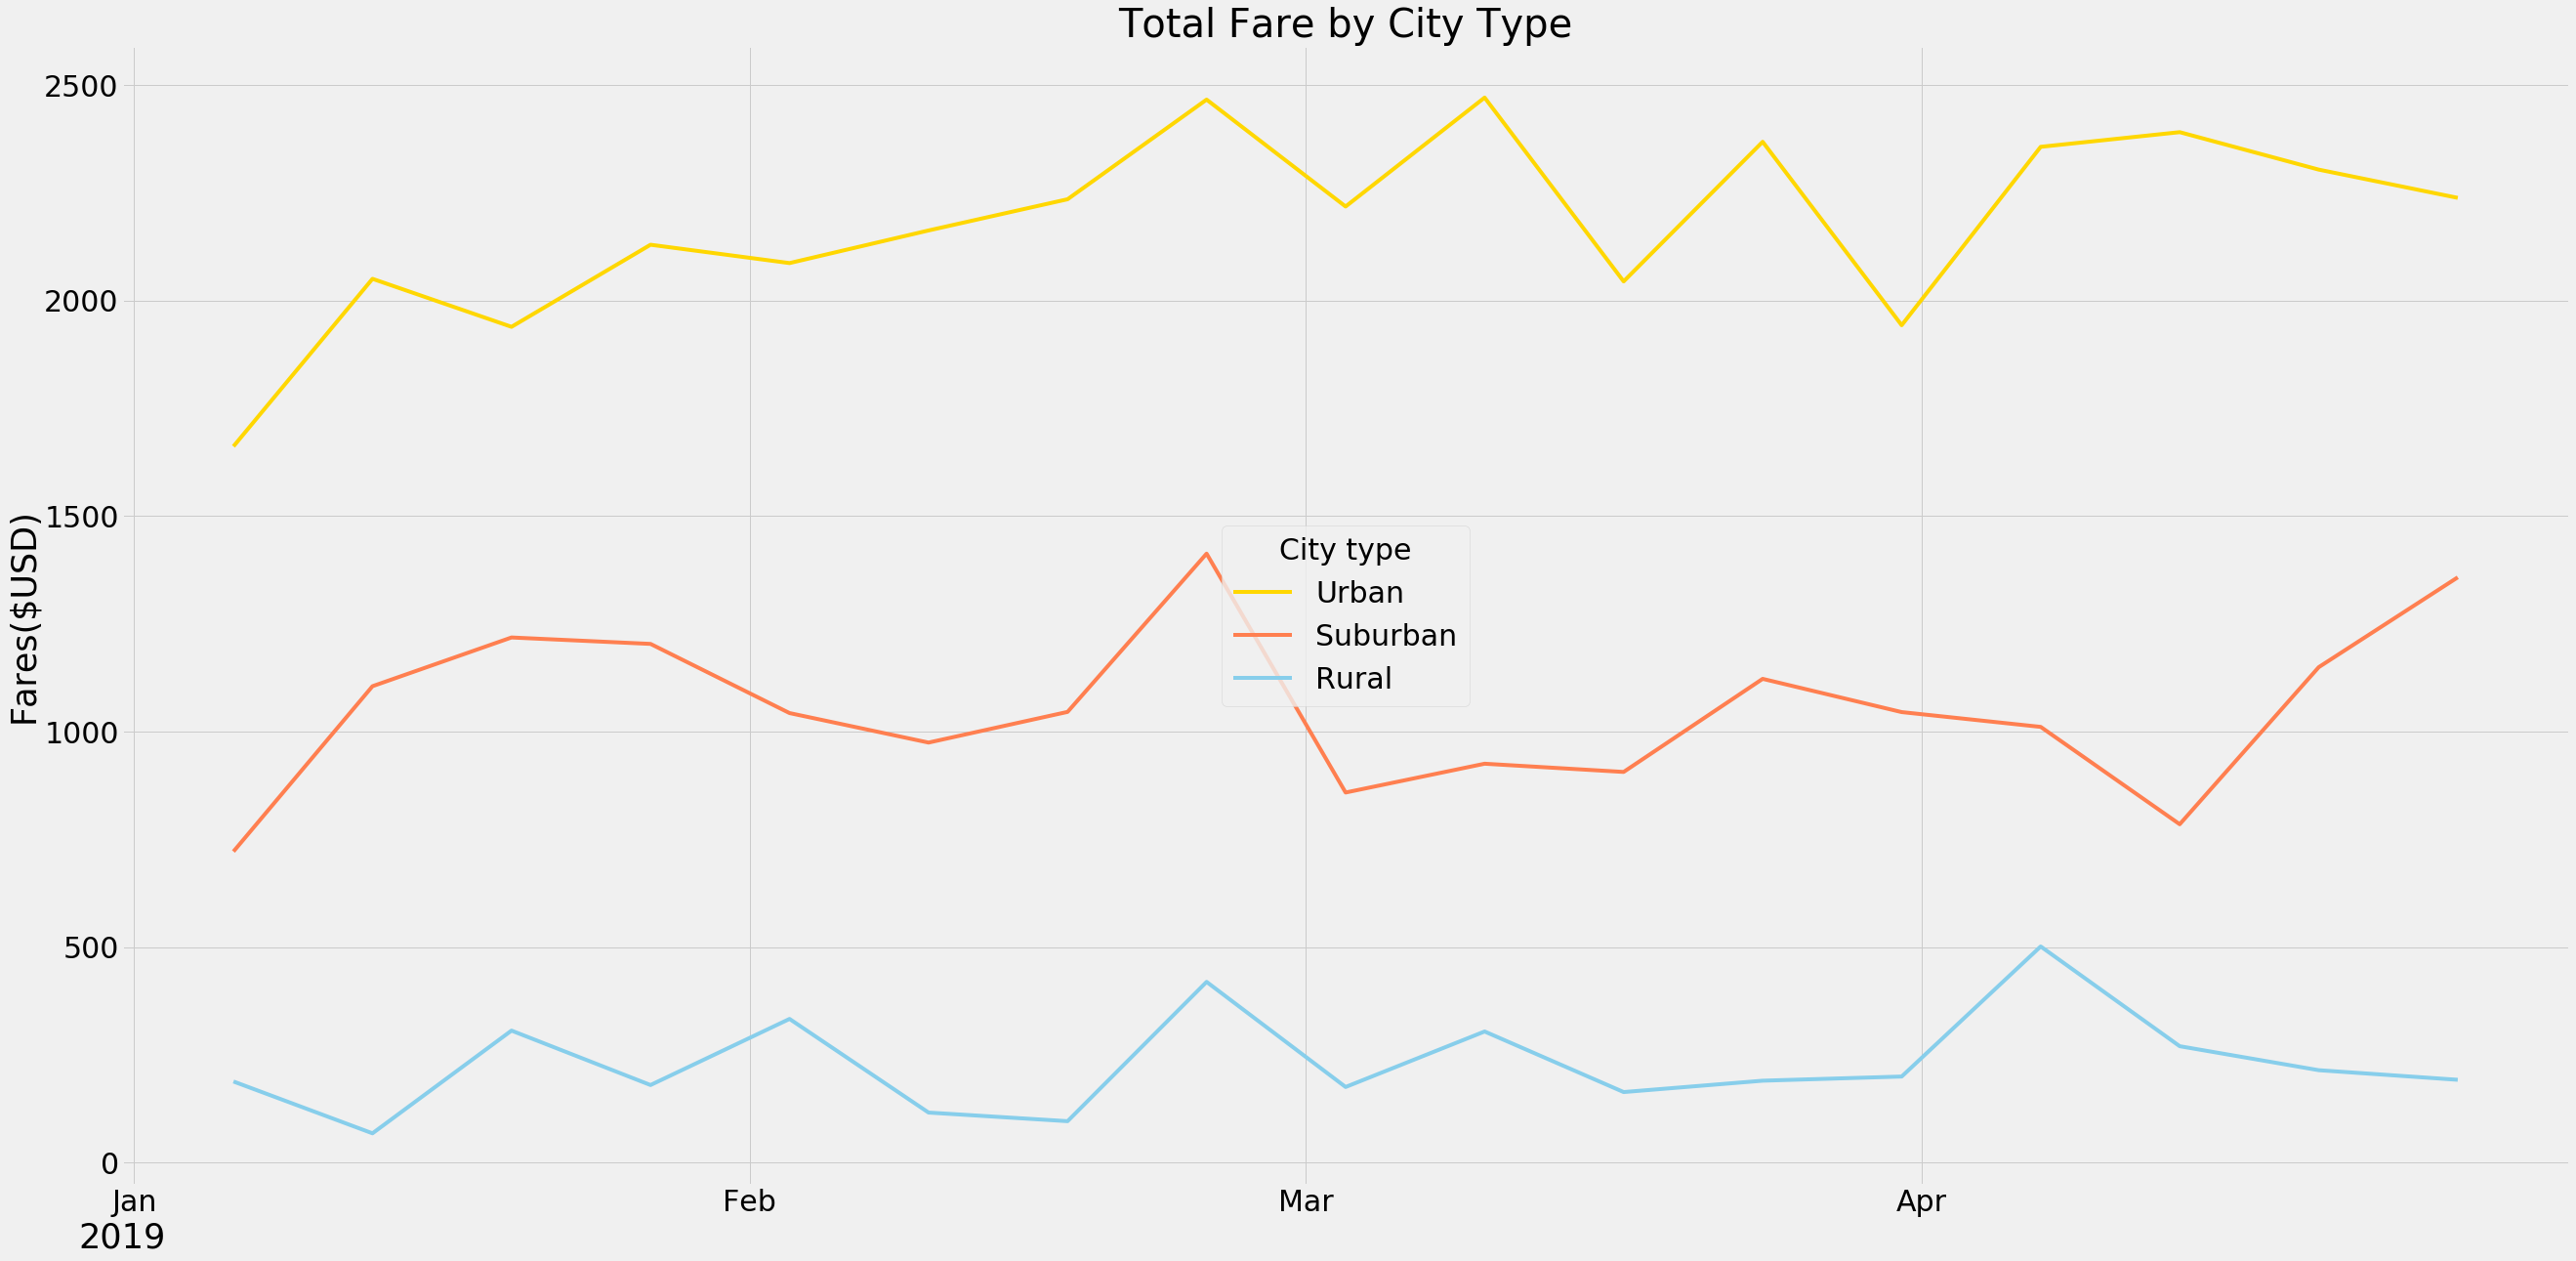

In [99]:
# Create FiveThirtyEight graph 
fig,ax = plt.subplots(figsize=(40,20))
plt.style.use('fivethirtyeight')
ax.plot(sum_week_df["Urban"],label="Urban", color = 'gold')
ax.plot(sum_week_df["Suburban"],label="Suburban", color = 'coral')
ax.plot(sum_week_df["Rural"],label="Rural", color = 'skyblue')
# Change the default font size to 30
mpl.rcParams['font.size'] = 30

# Change x-ticks and format
# Define the date format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
months = mdates.MonthLocator(range(1, 5), interval=1)
ax.xaxis.set_major_locator(months)
# Change y-ticks
ax.set_yticks(np.arange(0,2501, step=500.0))



# Add annotation
ax.set_ylabel("Fares($USD)", fontsize = 35)
ax.set_xlabel("2019", fontsize = 35, x=0)
ax.set_title('Total Fare by City Type', fontsize = 40)
#Add legend
lgnd = plt.legend(title='City type', fontsize = "30", mode="Expanded", loc="center")
lgnd.get_title().set_fontsize(30)
# Save the figure
plt.savefig("analysis/Total_Fare_by_CityType.png")
#Show plot 
plt.gca().grid(True)
plt.show()
